Sample Peaks (time sec, frequency Hz):
[(np.float64(14.59374149659864), np.float64(43.06640625)), (np.float64(15.01170068027211), np.float64(43.06640625)), (np.float64(16.880907029478458), np.float64(43.06640625)), (np.float64(18.099954648526076), np.float64(43.06640625)), (np.float64(18.274104308390022), np.float64(43.06640625)), (np.float64(18.575963718820862), np.float64(43.06640625)), (np.float64(20.491609977324263), np.float64(43.06640625)), (np.float64(21.571337868480725), np.float64(43.06640625)), (np.float64(21.71065759637188), np.float64(43.06640625)), (np.float64(22.140226757369614), np.float64(43.06640625))]


c:\Users\udayg\OneDrive\Desktop\NotShazam\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


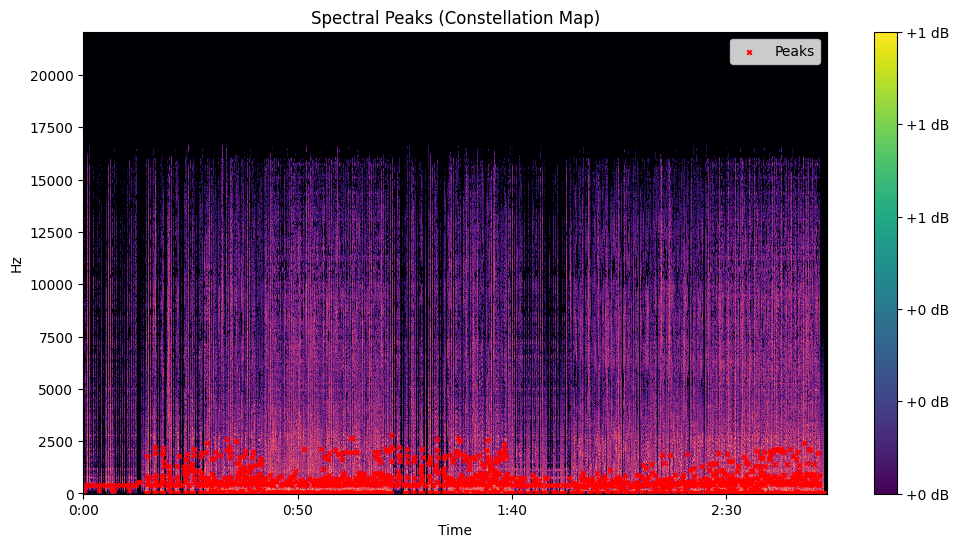

In [10]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from scipy.ndimage import maximum_filter, gaussian_filter

# Step 1: Load audio
y, sr = librosa.load('songs\\Run It Up - (Raag.Fm).mp3', sr=None)

# Step 2: Compute STFT
n_fft = 2048
hop_length = 512
S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S_mag = np.abs(S)

# Step 3: Smooth spectrogram (optional, helps with noisy peaks)
S_smooth = gaussian_filter(S_mag, sigma=1.0)

# Step 4: 2D local maxima detection
neighborhood_size = 20
local_max = maximum_filter(S_smooth, size=neighborhood_size) == S_smooth

# Step 5: Apply a threshold to keep only strong peaks
threshold = np.percentile(S_smooth[local_max], 95)  # keep top 5%
peak_mask = local_max & (S_smooth >= threshold)

# Step 6: Get peak coordinates (freq_bin, time_bin)
peak_indices = np.argwhere(peak_mask)

# Step 7: Convert to time (sec) and frequency (Hz)
peak_freqs = peak_indices[:, 0] * (sr / n_fft)
peak_times = peak_indices[:, 1] * (hop_length / sr)

# Combine for (time, freq) tuples
constellation_map = list(zip(peak_times, peak_freqs))

# Print few peaks
print("Sample Peaks (time sec, frequency Hz):")
print(constellation_map[:10])

# Optional: Visualize peaks on spectrogram
"""plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(S_mag, ref=np.max),
                         sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.scatter(peak_times, peak_freqs, marker='x', color='red', s=10, label='Peaks')
plt.title('Spectral Peaks (Constellation Map)')
plt.colorbar(format='%+2.0f dB')
plt.legend()
plt.show()"""

In [11]:
import hashlib

def generate_hashes(peaks, fan_value=5):
    """
    Generate landmark hashes from peaks.
    Each hash is made from (freq1, freq2, delta_time), anchored at time1.
    """
    hashes = []
    peaks = sorted(peaks)  # Sort by time

    for i in range(len(peaks)):
        t1, f1 = peaks[i]

        for j in range(1, fan_value + 1):
            if i + j < len(peaks):
                t2, f2 = peaks[i + j]

                delta_t = t2 - t1
                if 0 < delta_t <= 5.0:  # Limit max time delta for compact hashes
                    # Create hash string
                    hash_str = f"{int(f1)}|{int(f2)}|{int(delta_t * 100)}"
                    h = hashlib.sha1(hash_str.encode('utf-8')).hexdigest()[0:20]  # Shorten for space
                    hashes.append((h, t1))  # Store hash + anchor time

    return hashes

# Generate hashes
fingerprints = generate_hashes(constellation_map)

# Show some hashes
print("Sample Fingerprints (hash, time):")
for h in fingerprints[:10]:
    print(h)


Sample Fingerprints (hash, time):
('e9d85168445a5bcb3077', np.float64(0.12770975056689343))
('032ac8b615011a35051a', np.float64(0.12770975056689343))
('566ba4f9efb53a5d4361', np.float64(0.12770975056689343))
('10323e3e8cdfdd4ca11e', np.float64(0.12770975056689343))
('29ba0003a1a396132092', np.float64(0.12770975056689343))
('680bbbc5d882d2218946', np.float64(0.7662585034013606))
('2dc9651022bbe0ca5fb3', np.float64(0.7662585034013606))
('a49ed085f9ca42b3276f', np.float64(0.7662585034013606))
('66e37e51d2a0b7474220', np.float64(0.7662585034013606))
('393c42b968f3d9edf777', np.float64(0.7662585034013606))
